(DGFLUJOREDES)=

# 4.1 Definiciones generales de flujo en redes

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion_2 -p 8888:8888 -p 8787:8787 -d palmoreck/jupyterlab_optimizacion_2:3.0.0`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:3.0.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* Tendrá una lista de definiciones de flujo en redes que servirán de referencia para las notas del capítulo.

* Aprenderá cuáles son los problemas/modelos de flujo en redes estándar.

* Tendrá una lista de aplicaciones en el área de investigación de operaciones.


```

```{sidebar} Un poco de historia ...

El área de [investigación de operaciones](https://en.wikipedia.org/wiki/Operations_research) (IDO) tuvo un gran desarrollo entre los años 40's y 50's principalmente para resolver la asignación de recursos disponibles en actividades militares (de hecho el nombre hace referencia a operaciones militares). Métodos como el símplex de Dantzig fueron desarrollados en esta época y establecieron triunfos importantes del lado de Estados Unidos y Gran Bretaña en batallas militares. Posterior a la segunda guerra mundial la complejidad de la división del trabajo y organización en empresas plantearon problemas en esencia iguales que los que se debían resolver en las guerras.
Esta área resuelve problemáticas como son las relacionadas con la conducción y coordinación de actividades en una organización. Ha sido aplicada de manera extensa en manufactura, transporte, construcción, telecomunicaciones, planeación financiera, cuidado de la salud, fuerzas armadas y servicios públicos, entre otros. Un nombre que también le han dado a la IDO es el de *management science* o ciencia de la administración.
```

Muchas aplicaciones en el área de investigación de operaciones ayudan a modelar y resolver situaciones en forma de una **red** de nodos conectados como las siguientes:

1. Diseño de una tubería en una zona para conectar las locaciones de suministro de cierto producto con puntos de descarga del mismo con el objetivo de minimizar el costo de construír tal tubería. 
   Diseño de un cableado de telefonía subterránea para establecer la comunicación entre cualquier par de domicilios de personas con el objetivo de minimizar la cantidad de kilómetros que se usarán de cable.

2. Determinar la ruta más corta entre dos ciudades en una red de transporte que involucra más de dos ciudades.

3. Determinar la capacidad máxima de cierta sustancia que puede soportar una tubería que conecta dos o más plantas de suministro. 
   Determinar la asignación de personas en tranvías para llegar a destinos mediante varias rutas en un parque de diversiones de modo que se maximice el número total de viajes que se pueden hacer al día por diferentes rutas, las cuales tienen cierto límite de viajes en cada ruta.

4. Determinar la agenda y planeación de actividades incluyendo fechas de inicio y término de un proyecto.

5. Determinar la distribución de flujo con costo mínimo de campos de petróleo hacia refinerías a través de una red de tuberías.

```{admonition} Observación
:class: tip

Aunque el nombre de red y el de grafo se distinguen en que en la red se definen capacidades y costos mientras que en el grafo no, en este capítulo se utilizan ambos nombres como sinónimos.

```

## Problemas/Modelos de flujo en redes, *network flow problems/models*, estándar

Un buen número de problemas de optimización de redes son en realidad tipos especiales de problemas de **programación lineal**, por ejemplo el {ref}`problema de transporte <EJPROBTRANSPORTE>` en el que se resuelve cómo determinar la manera óptima de transportar bienes. Otro problema es el definido en un **problema de asignación** que incluye aplicaciones como la asignación de personas a tareas. Aunque los métodos clásicos del símplex o puntos interiores (ver {ref}`introducción a los métodos de puntos interiores <INTMETPIN>`) podrían utilizarse para resolver tales problemas, existen métodos especializados (como [network simplex](https://en.wikipedia.org/wiki/Network_simplex_algorithm) o el símplex dual) aplicados a redes que modelan tales problemas y tienen un mejor desempeño que los clásicos.

Es típico encontrar en la literatura el estudio de tres preguntas básicas relacionadas con problemas específicos:

1. **Problema del camino o ruta más corta, *shortest path***. ¿Cuál es la mejor manera para recorrer una red y llegar de un punto a otro de modo que sea lo más barato posible?

2. **Problema de flujo máximo, *maximum flow***. Si una red tiene capacidades en sus arcos ¿cómo podemos enviar la mayor cantidad de flujo posible entre dos puntos en la red manteniendo los límites de capacidades en sus arcos?

3. **Problema del flujo con costo mínimo, *minimum cost flow***. Si se incurre en un costo por unidad de flujo en una red con capacidades en sus arcos y necesitamos enviar unidades de un bien que residen en uno o más puntos en la red hacia uno o más puntos distintos en la misma ¿cómo podemos enviar tales unidades al mínimo costo posible?

A los problemas anteriores los nombraremos como **problemas/modelos de flujo en redes o *network flow problems/models* estándar**.

```{admonition} Comentarios

* La solución de los problemas estándar puede realizarse enumerando las posibles alternativas para cada problema (piénsese por ejemplo en el problema de encontrar la ruta más corta entre dos ciudades en una red de transporte), esto si bien resuelve las preguntas planteadas, no es práctico por la cantidad enorme de alternativas que resultarían. Por esto se requieren algoritmos cuyo tiempo de cómputo sea pequeño o al menos razonable. 

* Los problemas estándar han sido estudiados y descritos ampliamente en la literatura de IDO principalmente por ser modelos abstractos que han permitido el desarrollo de algoritmos para resolver problemas en aplicaciones que surgen en la práctica más complejos y que comparten similitudes con los estándar.

* Algunos ejemplos de asociación de la terminología de flujo en redes con sus componentes más importantes está dada por la siguiente tabla:

| Nodos | Arcos | Flujo |
|:---:|:---:|:---:|
|Puertos | Caminos | Vehículos|
|Aeropuertos| Líneas aéreas | Aviones |
|Puntos de conmutación | Cables, canales | Mensajes |
|Estaciones de bombeo | Tuberías | Líquidos |

```

## Definiciones generales para flujo en redes

La representación con redes las encontramos en muchas áreas como producción, distribución, planeación de proyectos, localización de instalaciones, administración de recursos y planeación financiera. Además, provee una visualización conceptual poderosa para mostrar las relaciones entre las componentes de sistemas científicos, sociales y económicos por mencionar algunos.

A continuación se presentan algunas definiciones utilizadas en la literatura sobre flujo en redes.

## Redes dirigidas

```{admonition} Definición

Una red dirigida, *digraph*, $\mathcal{G} = (\mathcal{N}, \mathcal{A})$ consiste de un conjunto $\mathcal{N}$ de nodos (vértices, puntos) y un conjunto $\mathcal{A}$ de arcos (aristas, ramas, líneas), *edges*, cuyos elementos son pares ordenados para nodos distintos.

```

### Ejemplo

La siguiente red dirigida tiene como nodos $\mathcal{N} = \{0, 1, 2, 3, 4, 5, 6\}$ y arcos $\mathcal{A} = \{(0,1), (0,2), (1,2), (1,3), (2,5), (3,4), (3,6), (4,1), (4,2), (4,6), (5,6) \}$.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

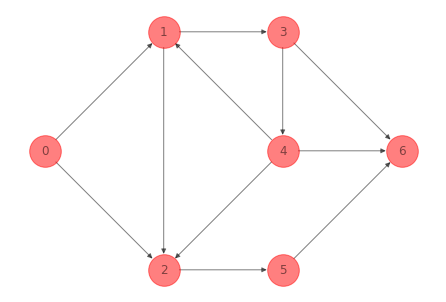

In [2]:
nodes_pos_ex_1 = [[0.09090909090909091, 0.4545454545454546],
                  [0.36363636363636365, 0.7272727272727273],
                  [0.36363636363636365, 0.18181818181818182],
                  [0.6363636363636364,  0.7272727272727273],
                  [0.6363636363636364,  0.4545454545454546],
                  [0.6363636363636364,  0.18181818181818182],
                  [0.9090909090909092,  0.4545454545454546]]
nodes = range(len(nodes_pos_ex_1))
G_ex_1 = nx.DiGraph() 
G_ex_1.add_nodes_from(nodes)
G_ex_1.add_edge(0,1)
G_ex_1.add_edge(0,2)
G_ex_1.add_edge(1,2)
G_ex_1.add_edge(1,3)
G_ex_1.add_edge(2,5)
G_ex_1.add_edge(3,4)
G_ex_1.add_edge(3,6)
G_ex_1.add_edge(4,1)
G_ex_1.add_edge(4,2)
G_ex_1.add_edge(4,6)
G_ex_1.add_edge(5,6)
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

```{admonition} Comentarios

Los siguientes nombres son utilizados para referirse a algunas componentes de un arco:

* El arco $(i,j)$ tiene dos *endpoints*: $i$ y $j$.

* El arco $(i,j)$ tiene *tail* $i$ y *head* $j$.

* El arco $(i,j)$ es incidente a los nodos $i,j$, sale (emana) del nodo $i$ y termina (entra) en el nodo $j$. 

```

## Grado de un nodo

```{admonition} Definición

El *indegree* de un nodo es el número arcos que entran al nodo y su *outdegree* es el número de arcos que salen del mismo. El grado de un nodo es la suma de su *indegree* y *outdegree*.

```

Para el grafo anterior se tiene:

In [3]:
print(nx.degree(G_ex_1))

[(0, 2), (1, 4), (2, 4), (3, 3), (4, 4), (5, 2), (6, 3)]


Entonces el nodo $0$ tiene un grado de $2$ y el nodo $6$ de $3$.

## Redes no dirigidas

```{admonition} Definición

Se define una red no dirigida al igual que el caso dirigido considerando que los arcos son pares no ordenados de nodos distintos. En una red no dirigida podemos referirnos al arco que une al par de nodos $i$ y $j$ como $(i,j)$ o $(j,i)$ indistintamente. 

```

```{admonition} Observación
:class: tip

La interpretación de un arco $(i,j)$ no dirigido se interpreta indicando que el flujo se permite en ambas direcciones, de $i$ a $j$ o $j$ a $i$. En el dirigido, el flujo sólo se permite en una dirección.

Además aunque se permita que el flujo a través de un arco no dirigido ocurra en cualquier dirección, se supone que el flujo será sólo en una dirección, en la seleccionada, y no se tendrán flujos simultáneos en direcciones opuestas. Este último caso requiere usar un par de arcos dirigidos en direcciones opuestas y también el flujo real será el flujo neto, esto es, la diferencia de los flujos asignados en las dos direcciones. Por ejemplo, si se asigna un flujo de $10$ en una dirección y después un flujo de $4$ en la dirección opuesta, el efecto real es la cancelación de $4$ unidades de la asignación original, lo que reduce el flujo en la dirección original de $10$ a $6$.

```

### Ejemplo

La siguiente red no dirigida tiene como nodos $\mathcal{N} = \{0, 1, 2, 3, 4, 5\}$ y arcos $\mathcal{A} = \{(1,0), (0,2), (1,3), (4,1), (2, 3), (2, 4), (3, 5), (4, 5) \}$:

```{margin}

La interpretación de la red presentada en este ejemplo es que se permite un flujo en los arcos $(i,j)$ y $(j, i)$.

```

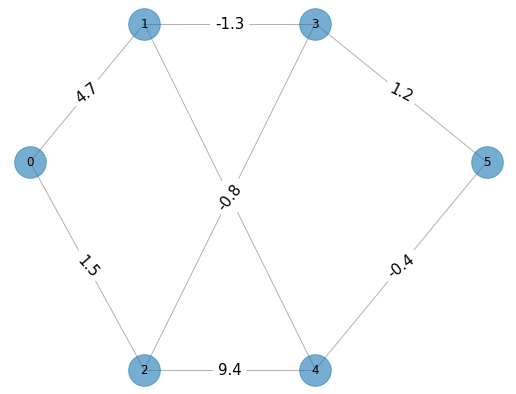

In [4]:
nodes_pos_ex_2 = [[0.09090909090909091, 0.5454545454545454],
                  [0.2727272727272727, 0.7272727272727273],
                  [0.2727272727272727, 0.2727272727272727],
                  [0.5454545454545454, 0.7272727272727273],
                  [0.5454545454545454, 0.2727272727272727],
                  [0.8181818181818182, 0.5454545454545454]]
nodes = range(len(nodes_pos_ex_2))
G_ex_2 = nx.Graph() 
G_ex_2.add_nodes_from(nodes)
edge_labels = {(0,1): 4.7,
               (0,2): 1.5,
               (1,3): -1.3,
               (1,4): 3.2,
               (2,3): -0.8,
               (2,4): 9.4,
               (3,5): 1.2,
               (4,5): -0.4
              }    
G_ex_2.add_edges_from(edge_labels)
for e in G_ex_2.edges():
    try:
        G_ex_2[e[0]][e[1]]["weight"] = edge_labels[e]
    except:
        G_ex_2[e[1]][e[0]]["weight"] = edge_labels[(e[1],e[0])]
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_2, pos=nodes_pos_ex_2, 
                       alpha=0.3, min_source_margin=8, 
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_2, pos=nodes_pos_ex_2, 
                             edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_2, pos=nodes_pos_ex_2)
nx.draw_networkx_nodes(G_ex_2, pos=nodes_pos_ex_2, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

La red anterior tiene arcos con **valores numéricos** asociados que ayudan a representar típicamente costos, capacidades y/o suministro o demanda. 

```{admonition} Definición

En la terminología de flujo en redes, la capacidad de un arco es la cantidad máxima de flujo que puede circular en el mismo.

```

```{admonition} Comentarios

* Los arcos en una red no dirigida en ocasiones se les nombra ligaduras.

* Una red no dirigida puede convertirse en una dirigida sustituyendo sus ligaduras por dos arcos en direcciones opuestas entre el par de nodos involucrados. La interpretación en este caso puede ser un "flujo neto" entre ambos nodos. Por tanto, las definiciones también son aplicables a redes no dirigidas y las definiciones que se dan en esta nota **asumen** que se tiene una red dirigida. Ver por ejemplo [to_directed](https://networkx.org/documentation/stable//reference/classes/generated/networkx.DiGraph.to_directed.html) para una función en *Python* que convierte a una red no dirigida en una dirigida añadiendo un par de arcos entre los nodos.

```

## Adyacencia

```{admonition} Definición

Si existe un arco $(i,j) \in  \mathcal{A}$ entonces el nodo $j$ es adyacente al nodo $i$.

```

## Representación de redes: matriz de adyacencia

Nos ayuda a representar las adyacencias entre nodos. Almacena la red como una matriz $\mathcal{M}_{A}$ de tamaño $n \times n$ con $n$ el número de nodos, tiene un renglón y columna por cada nodo. Su entrada $i,j$ es igual a $1$ si $(i,j) \in \mathcal{A}$ y $0$ en otro caso.

```{amonition} Comentario

Si tenemos $m$ arcos entonces $m$ elementos de $\mathcal{M}_{A}$ son distintos de cero. Si los arcos tienen costos o capacidades éstos se pueden almacenar en matrices del mismo tamaño siguiendo la misma representación anterior en la que se sustituye el $1$ por el costo o capacidad.

```

### Ejemplo

Para la red del ejemplo 1 anterior se tiene la función `adjacency_matrix` para una representación *sparse* de $\mathcal{M_A}$:

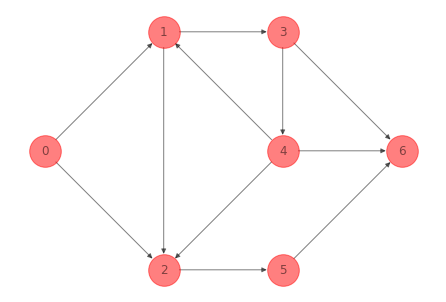

In [5]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

```{margin}

El resultado de la función `adjacency_matrix` es equivalente al de `to_scipy_sparse_matrix`

```

In [6]:
print(nx.to_scipy_sparse_matrix(G_ex_1))

  (0, 1)	1
  (0, 2)	1
  (1, 2)	1
  (1, 3)	1
  (2, 5)	1
  (3, 4)	1
  (3, 6)	1
  (4, 1)	1
  (4, 2)	1
  (4, 6)	1
  (5, 6)	1


In [7]:
print(nx.adjacency_matrix(G_ex_1))

  (0, 1)	1
  (0, 2)	1
  (1, 2)	1
  (1, 3)	1
  (2, 5)	1
  (3, 4)	1
  (3, 6)	1
  (4, 1)	1
  (4, 2)	1
  (4, 6)	1
  (5, 6)	1


Y se puede usar `to_numpy_array` para obtener una matriz de tamaño $7 \times 7$:

In [8]:
print(nx.to_numpy_array(G_ex_1))

[[0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]


Podemos leer la matriz de adyacencia por renglón o columna. En el renglón $i$ si nos encontramos con una entrada distinta de cero nos indica que en la red existe un arco dirigido que **sale** de $i$, esto es $(i,j) \in \mathcal{A}$. En la columna $j$ si nos encontramos con una entrada distinta de cero nos indica que en la red existe un arco dirigido que **entra** al nodo $j$, esto es $(i,j) \in \mathcal{A}$.

### Ejemplo

Para la red del ejemplo 2 anterior la matriz $\mathcal{M}_A$ es:

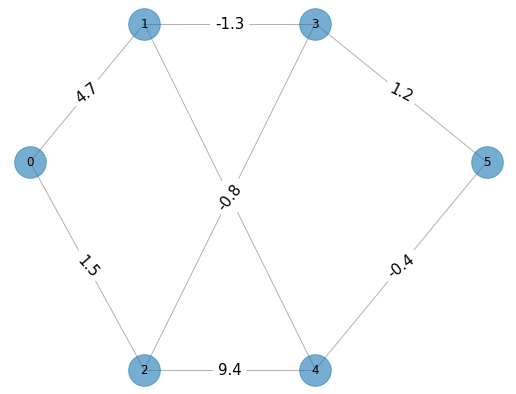

In [9]:
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_2, pos = nodes_pos_ex_2, alpha = 0.3, min_source_margin=8, min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_2, pos = nodes_pos_ex_2, edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_2, pos = nodes_pos_ex_2)
nx.draw_networkx_nodes(G_ex_2, pos = nodes_pos_ex_2, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show() 

```{margin}

Obsérvese que se utiliza la función `todense` pues se almacena el *NumPy* *array* en formato *sparse*.

```

In [10]:
print(nx.adjacency_matrix(G_ex_2).todense())

[[ 0.   4.7  1.5  0.   0.   0. ]
 [ 4.7  0.   0.  -1.3  3.2  0. ]
 [ 1.5  0.   0.  -0.8  9.4  0. ]
 [ 0.  -1.3 -0.8  0.   0.   1.2]
 [ 0.   3.2  9.4  0.   0.  -0.4]
 [ 0.   0.   0.   1.2 -0.4  0. ]]


```{admonition} Observación
:class: tip

Obsérvese que para una red no dirigida su matriz de adyacencia es simétrica.

```

### Ejemplo: otras representaciones en *Python*

Ver [converting-to-and-from-other-data-formats](https://networkx.org/documentation/stable//reference/convert.html#converting-to-and-from-other-data-formats) para otros formatos. Por ejemplo un *DataFrame* de *Pandas*:


In [11]:
print(nx.to_pandas_adjacency(G_ex_2))

     0    1    2    3    4    5
0  0.0  4.7  1.5  0.0  0.0  0.0
1  4.7  0.0  0.0 -1.3  3.2  0.0
2  1.5  0.0  0.0 -0.8  9.4  0.0
3  0.0 -1.3 -0.8  0.0  0.0  1.2
4  0.0  3.2  9.4  0.0  0.0 -0.4
5  0.0  0.0  0.0  1.2 -0.4  0.0



Una representación de la matriz de adyacencia usando diccionarios en *Python* es con la función `to_dict_of_dicts`:



In [12]:
import pprint

In [13]:
pprint.pprint(nx.to_dict_of_dicts(G_ex_2))

{0: {1: {'weight': 4.7}, 2: {'weight': 1.5}},
 1: {0: {'weight': 4.7}, 3: {'weight': -1.3}, 4: {'weight': 3.2}},
 2: {0: {'weight': 1.5}, 3: {'weight': -0.8}, 4: {'weight': 9.4}},
 3: {1: {'weight': -1.3}, 2: {'weight': -0.8}, 5: {'weight': 1.2}},
 4: {1: {'weight': 3.2}, 2: {'weight': 9.4}, 5: {'weight': -0.4}},
 5: {3: {'weight': 1.2}, 4: {'weight': -0.4}}}


(MATINCIDNODOARCO)=

## Representación de redes: matriz de incidencia nodo-arco

Nos ayuda a representar los arcos de una red como una matriz $\mathcal{M}_{I}$ de tamaño $n \times m$ con $n$ el número de nodos y $m$ el número de arcos que contiene un renglón por cada nodo de la red y una columna por cada arco. La columna correspondiente al arco $(i,j)$ tiene el número $1$ en el renglón correspondiente al nodo $i$ y un $-1$ en el renglón correspondiente al nodo $j$.

```{margin}

Multiplicamos por $-1$ pues el resultado de la función `incidence_matrix` está volteado respecto a la definición de la matriz $\mathcal{M}_I$. 
```

```{margin}

Obsérvese que se utiliza la función `todense` pues se almacena el *NumPy* *array* en formato *sparse*.

```

### Ejemplo

Para la red del ejemplo 1 anterior la matriz $\mathcal{M}_I$ es:

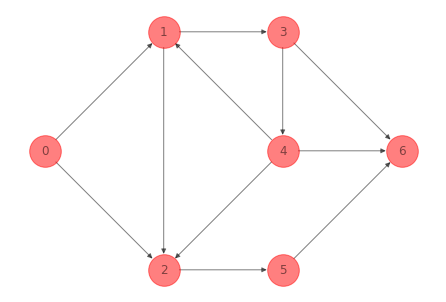

In [14]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

In [15]:
print(-1*nx.incidence_matrix(G_ex_1, oriented=True).todense())

[[ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  1.  1.  0.  0.  0. -1.  0.  0.  0.]
 [ 0. -1. -1.  0.  1.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  1.  1.  1.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0. -1. -1.]]


```{admonition} Comentarios


* Si consideramos a los renglones de la matriz de incidencia como vectores y hacemos la suma de los mismos entonces el resultado es cero, esto es equivalente a escribir que la matriz de incidencia no tiene *rank* igual a $n$. Puede verificarse que tiene *rank* igual a $n-1$.

* Sólo $2m$ de las $nm$ entradas son distintas de cero. Aún más, el número de $1$'s en un renglón equivale al *outdegree* del correspondiente nodo y el número de $-1$'s por renglón corresponde al *indegree* del nodo.



```

In [16]:
import numpy as np

In [17]:
print(np.linalg.matrix_rank(nx.incidence_matrix(G_ex_1, oriented=True).todense()))

6


## Subgrafo, subgrafo inducido, *spanning subgraph*

```{admonition} Definición

Una red $\mathcal{G}' = (\mathcal{N}', \mathcal{A}')$ es un subgrafo de $\mathcal{G}$ si $\mathcal{N}' \subseteq \mathcal{N}$ y $\mathcal{A}' \subseteq \mathcal{A}$.

```

### Ejemplo

Para la red del ejemplo 1 anterior un subgrafo es:

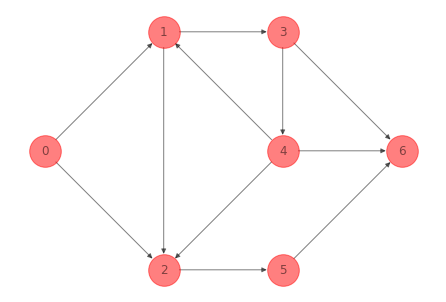

In [18]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

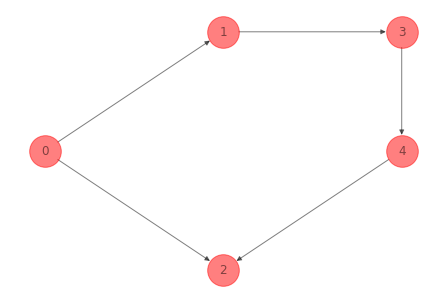

In [19]:
G_subgraph_ex_1 = nx.subgraph(G_ex_1, [0, 1, 2, 3, 4]).copy()
G_subgraph_ex_1.remove_edges_from([(1,2), (4,1)])
nx.draw(G_subgraph_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

```{admonition} Definición

$\mathcal{G}' = (\mathcal{N}', \mathcal{A}')$ es un subgrafo de $\mathcal{G}$ inducido por $\mathcal{N}'$ si $\mathcal{A}'$ contiene todos los arcos en $\mathcal{A}$ (ambos *endpoints* deben estar en $\mathcal{N}'$).

```

### Ejemplo

Para la red del ejemplo 1 anterior un subgrafo inducido por el conjunto de nodos $\mathcal{N} = \{0, 1, 2, 3, 4\}$ es:

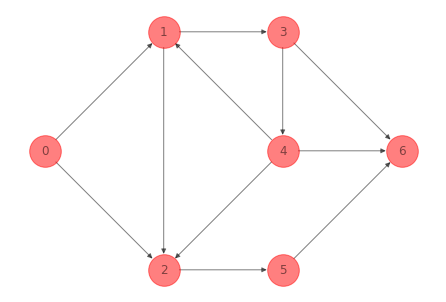

In [20]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

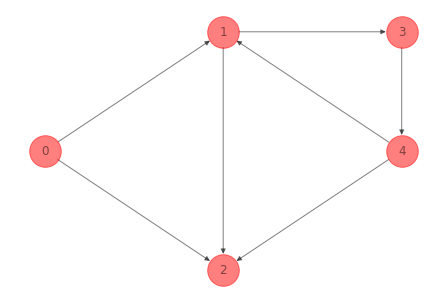

In [21]:
G_induced_subgraph_ex_1 = nx.subgraph(G_ex_1, [0, 1, 2, 3, 4])
nx.draw(G_induced_subgraph_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

```{admonition} Definición

Una red $\mathcal{G}' = (\mathcal{N}', \mathcal{A}')$ es una *spanning subgraph* de $\mathcal{G}$ si $\mathcal{N}' = \mathcal{N}$ y $\mathcal{A}' \subseteq \mathcal{A}$. Esto es, *spans* todos los nodos de $\mathcal{G}$.

```

### Ejemplo

Para la red del ejemplo 1 anterior una *spanning subgraph* es:

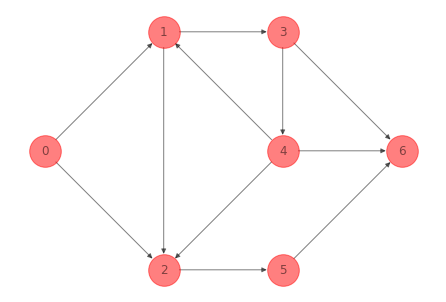

In [22]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

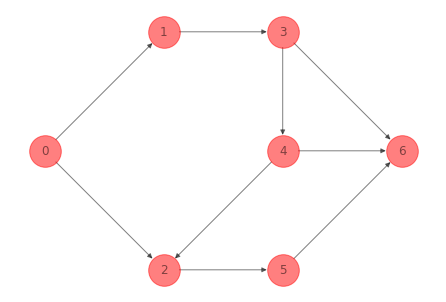

In [23]:
G_spanning_subgraph_ex_1 = G_ex_1.copy()
G_spanning_subgraph_ex_1.remove_edges_from([(1,2), (4,1)])
nx.draw(G_spanning_subgraph_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

## Caminata, *walk*

```{admonition} Definición

Una caminata es una secuencia de nodos (o también arcos) conectados de una red no importando la dirección de sus arcos que los conectan. La secuencia indica que se parte desde un nodo y llega hasta otro. 

```

### Ejemplo

Para la red del ejemplo 1 anterior una caminata conformada por la secuencia de nodos $0-2-5-6-4-2$ es:

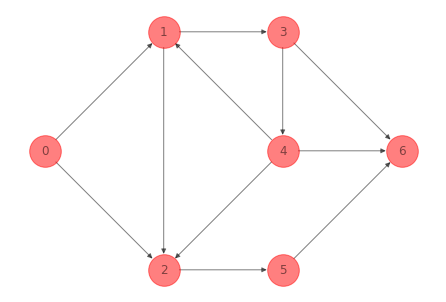

In [24]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

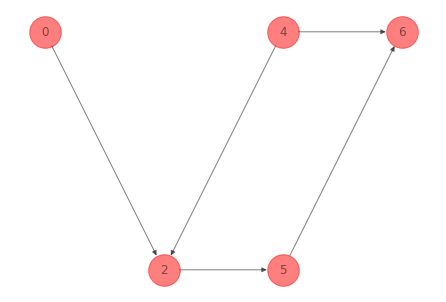

In [25]:
G_walk_ex_1 =nx.subgraph(G_ex_1, [0, 2, 5, 6, 4]).copy()
nx.draw(G_walk_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

```{admonition} Observación
:class: tip

En una caminata se pueden repetir nodos.

```

## Caminata dirigida, *directed walk*

```{admonition} Definición

Una caminata dirigida es una secuencia de nodos (o también arcos) de una red en la que sí importa la dirección de los arcos. La secuencia indica que se parte desde un nodo y llega hasta otro.

```

### Ejemplo

Para la red del ejemplo 1 anterior una caminata dirigida compuesta por la secuencia de nodos $0-1-3-4-1-2$ es:

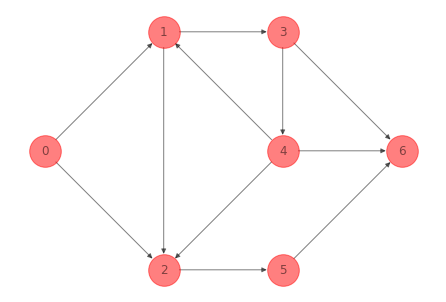

In [26]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

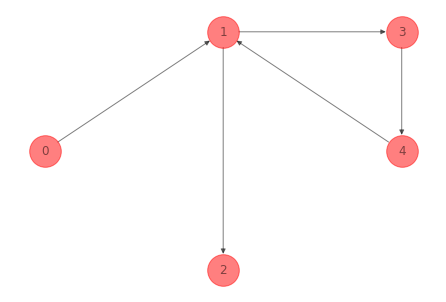

In [27]:
G_directed_walk_ex_1 =nx.subgraph(G_ex_1, [0, 1, 3, 4, 1, 2]).copy()
G_directed_walk_ex_1.remove_edges_from([(0,2), (4,2)])
nx.draw(G_directed_walk_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

## Ruta o camino, *path*

```{admonition} Definición

Un camino es una caminata en la que no se repiten los nodos y parte desde un nodo y llega hasta otro.

```

### Ejemplo

Para la red del ejemplo 1 anterior un camino conformado por la secuencia de nodos $1-4-6-5$ es:

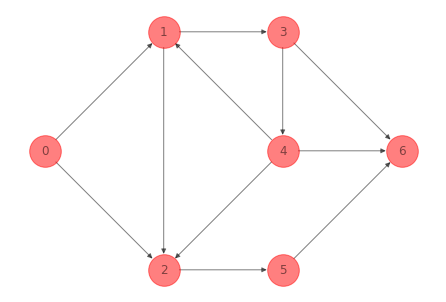

In [28]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

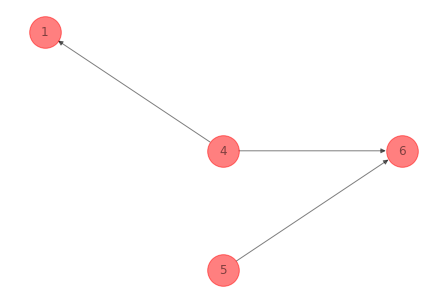

In [29]:
G_path_ex_1 =nx.subgraph(G_ex_1, [1, 4, 6, 5]).copy()
nx.draw(G_path_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

```{admonition} Observación
:class: tip

En los caminos se pueden distinguir aquellos arcos como *forward arcs* o *backward arcs*. Para el camino anterior el arco $(4, 6)$ es un *forward arc* y $(1, 4), (5, 6)$ son *backward arcs*.

```

## Ruta dirigida, *directed path* 

```{admonition} Definición

Una ruta dirigida es un camino dirigido que parte desde un nodo y llega hasta otro.

```

### Ejemplo

Para la red del ejemplo 1 anterior un *directed path* de la secuencia de nodos $0-1-2-5-6$ es:

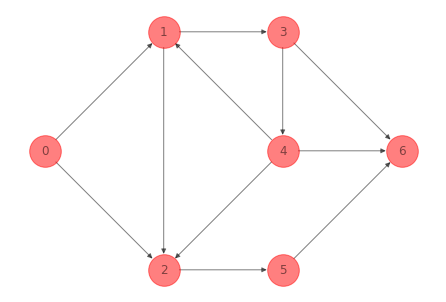

In [30]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

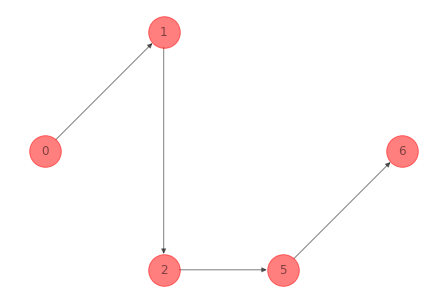

In [31]:
G_directed_path_ex_1 =nx.subgraph(G_ex_1, [0, 1, 2, 5, 6]).copy()
G_directed_path_ex_1.remove_edge(0, 2)
nx.draw(G_directed_path_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

Y tenemos unas funciones para determinar si son *directed paths* o no:

In [32]:
print(nx.classes.function.is_path(G_ex_1, [0, 1, 2, 5, 6]))

True


In [33]:
print(nx.classes.function.is_path(G_ex_1, [0, 1, 4]))

False


```{admonition} Observación
:class: tip

En una ruta dirigida todos los arcos son *forward*.

```

## Ciclo

```{admonition} Definición

Un ciclo es un camino cerrado (comienza y termina en el mismo nodo).

```

### Ejemplo

Para la red del ejemplo 1 anterior podemos usar la función [find_cycle](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cycles.find_cycle.html) con el argumento `ignore` para encontrar uno de los ciclos:

In [34]:
G_cycle_ex_1 = nx.find_cycle(G_ex_1, source=0, orientation="ignore")

In [35]:
G_cycle_ex_1

[(1, 2, 'forward'),
 (2, 5, 'forward'),
 (5, 6, 'forward'),
 (3, 6, 'reverse'),
 (3, 4, 'forward'),
 (4, 1, 'forward')]

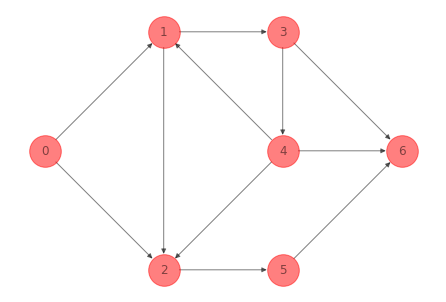

In [36]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

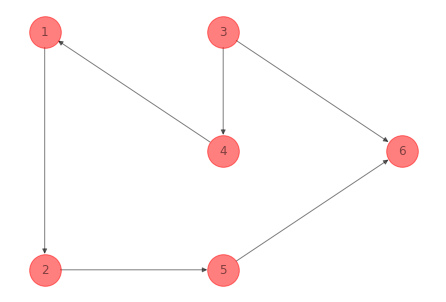

In [37]:
G_plot_cycle_ex_1 = nx.subgraph(G_ex_1, [1, 2, 3, 4, 5, 6]).copy()
G_plot_cycle_ex_1.remove_edges_from([(1, 3), (4, 6), (4, 2)])
nx.draw(G_plot_cycle_ex_1, pos=nodes_pos_ex_1,
        with_labels= True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

Otro ciclo conformado por la secuencia de nodos $4-2-5-6$ es:

In [38]:
G_cycle_2_ex_1 = nx.subgraph(G_ex_1, [4, 2, 5, 6]).copy()

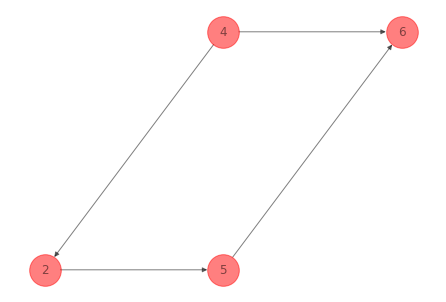

In [39]:
nx.draw(G_cycle_2_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

## Ciclo dirigido

```{admonition} Definición

Un ciclo dirigido contiene el arco $(\text{nodo fin},\text{nodo inicio})$ con $\text{nodo fin}$ el último nodo del *directed path* y $\text{nodo inicio}$ el primero del *directed path*.

```

### Ejemplo

Para la red del ejemplo 1 anterior podemos volver a usar la función de `find_cycle` con el argumento `original` para encontrar un ciclo dirigido:

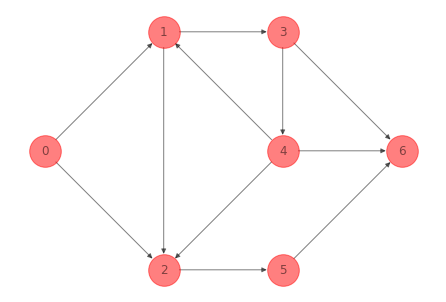

In [40]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

In [41]:
G_directed_cycle_ex_1 = nx.find_cycle(G_ex_1, source=0, orientation="original")

In [42]:
G_directed_cycle_ex_1

[(1, 3, 'forward'), (3, 4, 'forward'), (4, 1, 'forward')]

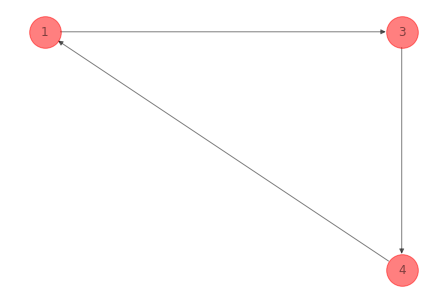

In [43]:
G_plot_directed_cycle_ex_1 = nx.subgraph(G_ex_1, [1, 3, 4]).copy()
nx.draw(G_plot_directed_cycle_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

## Red conectada

```{admonition} Definición

Dos nodos están conectados si existe al menos un camino entre éstos. Una red es conectada si cada par de nodos son conectados.

```

### Ejemplo

La red del ejemplo 1 anterior es conectada:

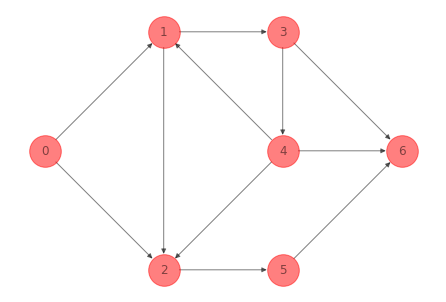

In [44]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

In [45]:
print(nx.is_connected(G_ex_1.to_undirected()))

True


Un ejemplo de un subgrafo **no** conectado que resulta de eliminar algunos arcos de la red anterior:

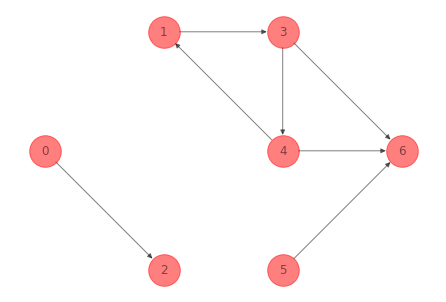

In [46]:
G_not_connected_ex_1 = G_ex_1.copy()
G_not_connected_ex_1.remove_edges_from([(0, 1), (1, 2), 
                                   (4, 2), (2,5)])
nx.draw(G_not_connected_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

In [47]:
print(nx.is_connected(G_not_connected_ex_1.to_undirected()))

False


## Red fuertemente conectada

Una red es fuertemente conectada si existe al menos un *directed path* entre cada par de nodos.

### Ejemplo

La red del ejemplo 1 anterior **no** es fuertemente conectada:

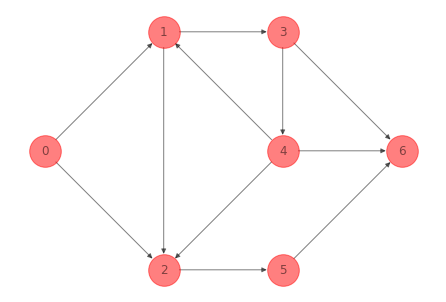

In [48]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

In [49]:
print(nx.is_strongly_connected(G_ex_1))

False


Pero cambiando la dirección de dos arcos obtenemos una red que sí es fuertemente conectada:

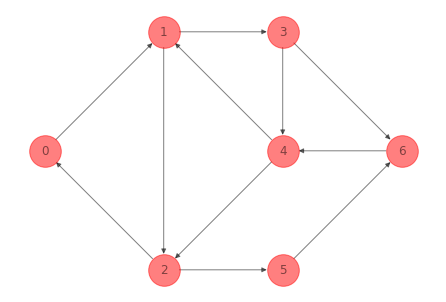

In [50]:
G_strongly_connected = G_ex_1.copy()
G_strongly_connected.remove_edges_from([(0, 2), (4, 6)])
G_strongly_connected.add_edges_from([(2, 0), (6, 4)])
nx.draw(G_strongly_connected, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

In [51]:
print(nx.is_strongly_connected(G_strongly_connected))

True


## Red acíclica, árbol y bosque

```{margin}

Ver [tree](https://networkx.org/documentation/stable//reference/algorithms/tree.html) para tales definiciones en el contexto del paquete `networkx`.

```

```{margin}

Recuérdese que se consideran redes dirigidas en las definiciones. Para el caso de una red no dirigida el adjetivo acíclico se refiere a no tener ciclos.

```

```{admonition} Definiciones

* Una red acíclica es aquella que no contiene ciclos dirigidos.

* Una red conectada que no tiene ciclos se le nombra árbol. 

* Una red que no tiene ciclos dirigidos se le nombra bosque.

```

### Ejemplo

La red del ejemplo 1 **no** es acíclica:

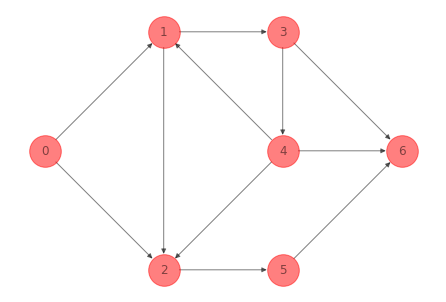

In [52]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

In [53]:
print(nx.is_directed_acyclic_graph(G_ex_1))

False


Y eliminando el arco $(1, 3)$ obtenemos un subgrafo que sí es acíclico:

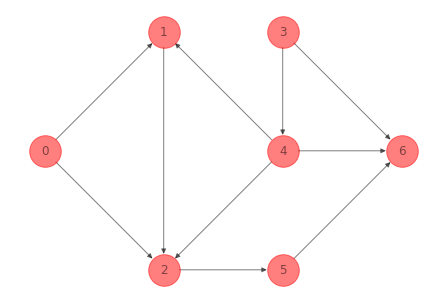

In [54]:
G_acyclic_ex_1 = G_ex_1.copy()
G_acyclic_ex_1.remove_edges_from([(1, 3)])
nx.draw(G_acyclic_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

In [55]:
print(nx.is_directed_acyclic_graph(G_acyclic_ex_1))

True


### Ejemplo

Un ejemplo de árbol de la red del ejemplo 1 es:

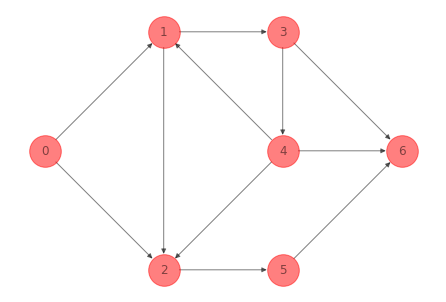

In [56]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

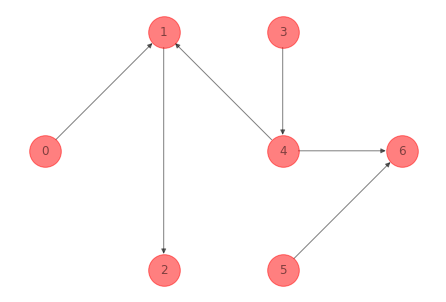

In [57]:
G_tree_ex_1 = G_ex_1.copy()
G_tree_ex_1.remove_edges_from([(1, 3), (3, 6), (0, 2), (4, 2),
                               (2, 5)])
nx.draw(G_tree_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

```{margin}

Ver [is_tree](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.tree.recognition.is_tree.html)

```

In [58]:
print(nx.is_tree(G_tree_ex_1))

True


Otro ejemplo de árbol en el caso de una red no dirigida:

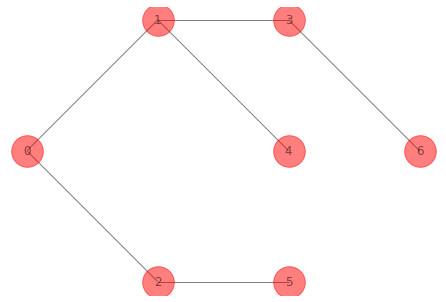

In [59]:
G_tree_2_ex_1 = nx.minimum_spanning_tree(G_ex_1.to_undirected())
nx.draw(G_tree_2_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

In [60]:
print(nx.is_tree(G_tree_2_ex_1))

True


Un ejemplo de árbol que no inicia de un único nodo:

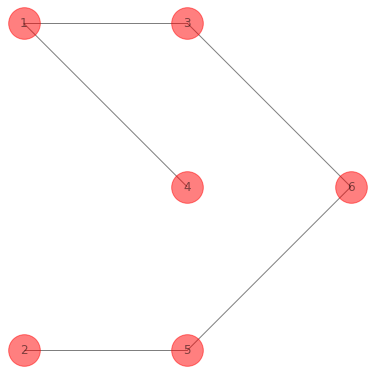

In [61]:
plt.figure(figsize=(5,5))
G_tree_3_ex_1 = G_tree_2_ex_1.subgraph([1, 2, 3, 4, 5, 6]).copy()
G_tree_3_ex_1.add_edge(5, 6)
nx.draw(G_tree_3_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

In [62]:
print(nx.is_tree(G_tree_3_ex_1))

True


### Ejemplo

Un ejemplo de bosque para la red del ejemplo 1 es:

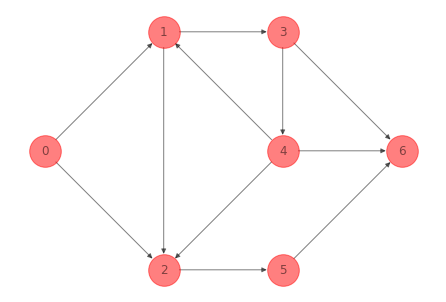

In [63]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

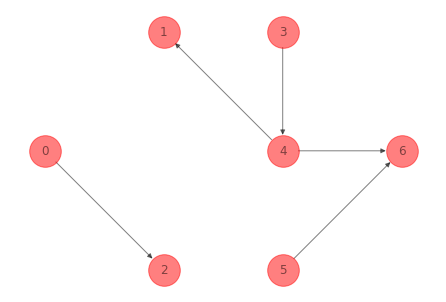

In [64]:
G_forest_ex_1 = G_ex_1.copy()
G_forest_ex_1.remove_edges_from([(0, 1), (1, 2), 
                                 (4, 2), (2,5),
                                 (1, 3), (3, 6)])
nx.draw(G_forest_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

```{margin}

Ver [is_forest](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.tree.recognition.is_forest.html)

```

In [65]:
print(nx.is_forest(G_forest_ex_1))

True


Observa que si se elimina el arco $(0, 2)$ continúa siendo un bosque:

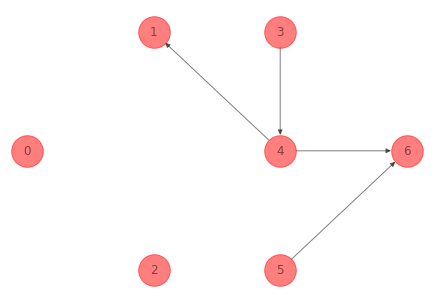

In [66]:
G_forest_2_ex_1 = G_ex_1.copy()
G_forest_2_ex_1.remove_edges_from([(0, 1), (1, 2), 
                                   (4, 2), (2,5),
                                   (1, 3), (3, 6),
                                   (0,2)])
nx.draw(G_forest_2_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

In [67]:
print(nx.is_forest(G_forest_2_ex_1))

True


```{admonition} Comentarios

* Un subgrafo de un árbol conectado es un *subtree*.

* Un árbol de $n$ nodos tiene exactamente $n-1$ arcos.

* Todo árbol con $n \geq 2$ nodos tiene al menos dos nodos **hoja**. Un nodo hoja es aquél que tiene un grado de uno.

* En un árbol dos nodos están conectados por un único camino.

```

(ARBORYSPANTREE)=

## Arborescencia y *spanning tree*

```{admonition} Definición

* Una arborescencia es un árbol en el que se tiene un nodo designado como "raíz" y existe un *directed path* que parte de la raíz a cada nodo.

* Dada una red $\mathcal{G} = (\mathcal{N}, \mathcal{A})$, un *spanning tree* es un árbol que incluye todos los nodos en $\mathcal{N}$ (es una *spanning subgraph* que además es un árbol).

```

### Ejemplo

Para la red del ejemplo 1 se tiene una arborescencia y un *spanning tree* siguiente:

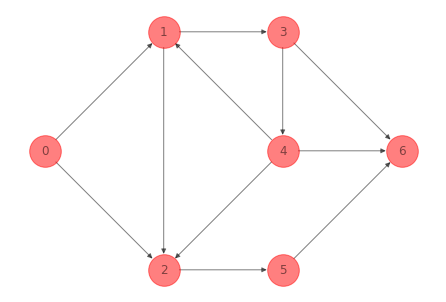

In [68]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

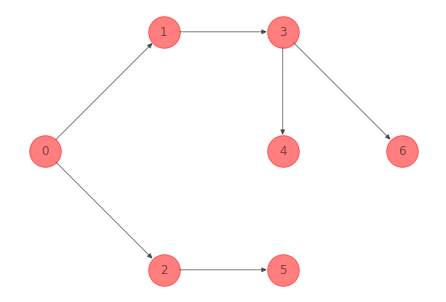

In [69]:
G_arborescence_ex_1 = nx.algorithms.minimum_spanning_arborescence(G_ex_1)
nx.draw(G_arborescence_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()


```{admonition} Comentarios

* Aquellos arcos que pertenecen al *spanning tree* se les nombra *tree arcs* y los que no pertenecen *nontree arcs*.

* En una arborescencia se tiene un *indegree* máximo de uno.


* Una metodología para crear un *spanning tree* es la siguiente: considerar una red sin arcos y con $n$ nodos. Añadir arcos en la siguiente manera: "el primer arco puede ir en cualquier lugar de modo que conecte algún par de nodos. De ahí en adelante, cada arco nuevo debe agregarse entre un nodo que ya haya sido conectado a otros nodos y a un nuevo nodo no conectado. Si se agregan arcos de esta manera, se evita que se forme un ciclo y además se asegura que el número de nodos conectados sea uno más que el número de arcos. Cada nuevo arco crea un árbol más grande que no contiene ciclos. Una vez agregado el (n – 1)-ésimo arco, el proceso se detiene porque el árbol resultante se expande, *spans*, (conecta) hacia todos los n nodos.

```

## Algunos resultados útiles de árboles

(CICLOFUND)=

### Ciclo fundamental

```{admonition} Definición

Si tenemos un *spanning tree* de una red $\mathcal{G}$ y se le añade algún *nontree arc* entonces se crea exactamente un ciclo al que se le nombra *ciclo fundamental*.

```

### Sobre eliminar ciclos en un *spanning tree*

Supóngase que se ha creado un ciclo fundamental en un *spanning tree*. Si se borra tal ciclo fundamental del *spanning tree* se obtiene nuevamente un *spanning tree*.

### Ejemplo

La siguiente red es un *spanning tree* del ejemplo 1:

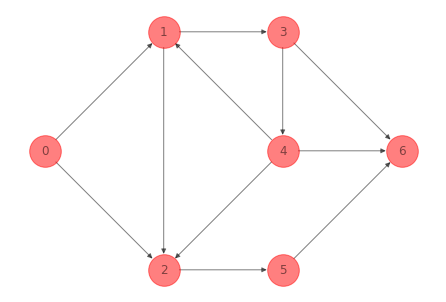

In [70]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

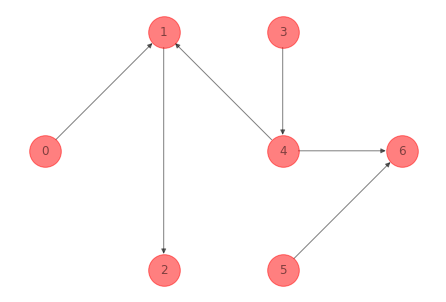

In [71]:
nx.draw(G_tree_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

Los *nontree arcs* son: $(0, 2), (2, 4), (2, 5), (1, 3), (3, 6)$. Añadimos $(0, 2)$ al *spanning tree* y obtenemos un ciclo fundamental:

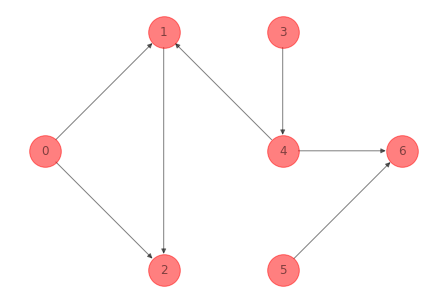

In [72]:
G_tree_example_fundamental_cycle = G_tree_ex_1.copy()
G_tree_example_fundamental_cycle.add_edge(0, 2)
nx.draw(G_tree_example_fundamental_cycle, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

Si eliminamos el arco $(1, 2)$ obtenemos un *spanning tree*:

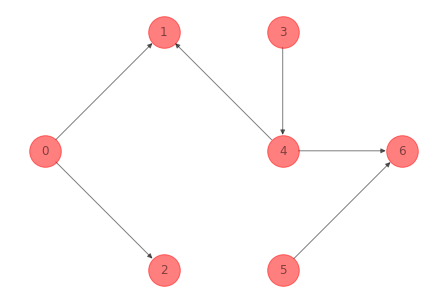

In [73]:
G_tree_example_fundamental_cycle.remove_edge(1, 2)
nx.draw(G_tree_example_fundamental_cycle, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

```{admonition} Observación
:class: tip

Obsérvese que si una red tiene $n$ nodos y $m$ arcos entonces existen $m -  n + 1$ ciclos fundamentales (mismo número que *nontree arcs*).

```

### Sobre cortes fundamentales en un *spanning tree*

Si tenemos un *spanning tree* de una red $\mathcal{G}$ al que se le elimina algún *tree arc* entonces se genera una red no conectada en la que se tienen dos *subtrees*. Aquellos arcos cuyos *endpoints* pertenecen a diferentes *subtrees* constituyen lo que se conoce como **cortes fundamentales** de la red $\mathcal{G}$ respecto al *spanning tree*. Si se añade algún arco perteneciente a los cortes fundamentales se obtiene un *spanning tree*.

### Ejemplo

La siguiente red es un *spanning tree* del ejemplo 1:

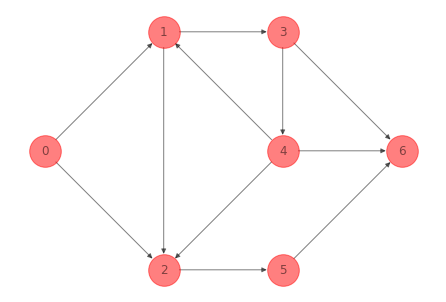

In [74]:
nx.draw(G_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000, alpha=0.5)
plt.show()

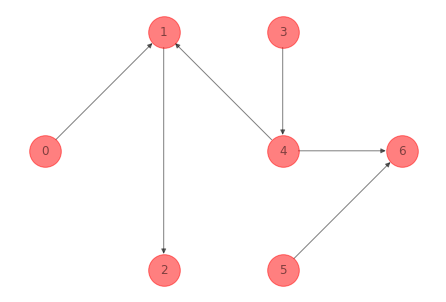

In [75]:
nx.draw(G_tree_ex_1, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

Los *tree arcs* son: $(0, 1), (1, 2), (4, 1), (3, 4), (4, 6), (5, 6)$. Si eliminamos el arco $(4, 1)$ del *spanning tree* anterior se obtienen dos árboles:

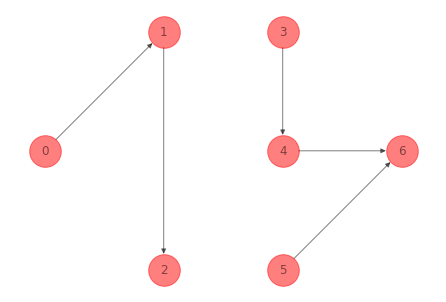

In [76]:
G_tree_example_fundamental_cut = G_tree_ex_1.copy()
G_tree_example_fundamental_cut.remove_edge(4, 1)
nx.draw(G_tree_example_fundamental_cut, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

Los arcos de la red del ejemplo 1 en el corte fundamental son: $(4, 1), (1, 3), (4, 2), (2, 5)$. Si añadimos el arco $(2, 5)$ obtenemos un *spanning tree*:

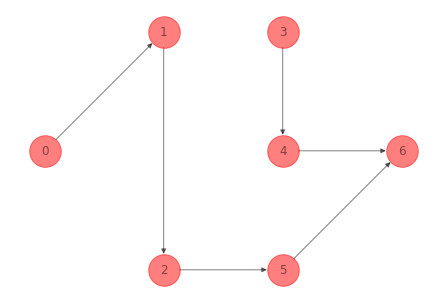

In [77]:
G_tree_example_fundamental_cut.add_edge(2, 5)
nx.draw(G_tree_example_fundamental_cut, pos=nodes_pos_ex_1,
        with_labels=True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

```{admonition} Observación
:class: tip

Un *spanning tree* tiene $n-1$ cortes fundamentales respecto a cualquier red.

```

```{admonition} Ejercicio
:class: tip

Para fortalecer las definiciones y resultados anteriores realiza ejemplos de redes de cada definición y resultado.

```

## Ejemplo de problemas/modelos estándar de flujo en redes

### Camino o ruta más corta

Dada la siguiente red se desea encontrar el camino más corto entre los nodos 'O' y 'T' de la siguiente red:

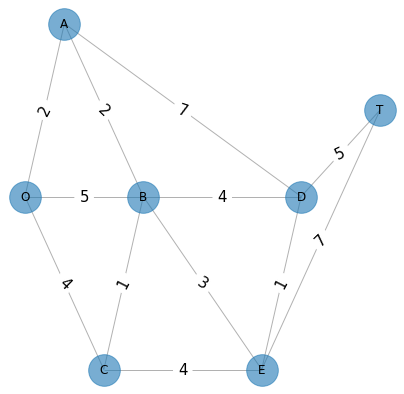

In [78]:
nodes_pos_ex_std_model = [[0.0, 0.5454545454545454],
                          [0.09090909090909091, 0.7272727272727273],
                          [0.2727272727272727, 0.5454545454545454],
                          [0.18181818181818182, 0.36363636363636365],
                          [0.6363636363636364, 0.5454545454545454],
                          [0.5454545454545454, 0.36363636363636365],
                          [0.8181818181818182, 0.6363636363636364]]

nodes_std_model = ['O', 'A', 'B', 'C', 'D', 'E', 'T' ]

nodes_and_pos_std_model = dict(zip(nodes_std_model, nodes_pos_ex_std_model))

G_shortest_path = nx.Graph() 
G_shortest_path.add_nodes_from(nodes_std_model)

edge_labels_shortest_path = {('O', 'A'): 2,
                             ('O', 'B'): 5,
                             ('O', 'C'): 4,
                             ('A', 'B'): 2,
                             ('A', 'D'): 7,
                             ('B', 'D'): 4,
                             ('B', 'E'): 3,               
                             ('C', 'B'): 1,
                             ('C', 'E'): 4,
                             ('D', 'E'): 1,
                             ('D', 'T'): 5,
                             ('E', 'T'): 7
                            } 
G_shortest_path.add_edges_from(edge_labels_shortest_path)
for e in G_shortest_path.edges():
    try:
        G_shortest_path[e[0]][e[1]]["weight"] = edge_labels_shortest_path[e]
    except:
        G_shortest_path[e[1]][e[0]]["weight"] = edge_labels_shortest_path[(e[1],e[0])]

plt.figure(figsize=(7, 7))
nx.draw_networkx_edges(G_shortest_path, pos=nodes_and_pos_std_model, 
                       alpha=0.3, min_source_margin=8,
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_shortest_path, pos=nodes_and_pos_std_model, 
                             edge_labels=edge_labels_shortest_path,
                             font_size=15)
nx.draw_networkx_labels(G_shortest_path, pos=nodes_and_pos_std_model)
nx.draw_networkx_nodes(G_shortest_path, pos=nodes_and_pos_std_model, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

Cada valor de los arcos representan las distancias entre cada nodo.

```{margin}

Ver [shortest_path](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path)

```

In [79]:
sh_path = nx.shortest_path(G_shortest_path,source='O',
                       target='T', weight="weight")
print(sh_path)

['O', 'A', 'B', 'D', 'T']


In [80]:
edges_sh_path = [(sh_path[k-1], sh_path[k]) for k in range(1, len(sh_path))]
edge_att = nx.get_edge_attributes(G_shortest_path, "weight")
distances_sh_path = {k: edge_att[k] for k in edges_sh_path}

In [81]:
print(distances_sh_path)

{('O', 'A'): 2, ('A', 'B'): 2, ('B', 'D'): 4, ('D', 'T'): 5}


In [82]:
print(nx.shortest_path_length(G_shortest_path, source='O',
                              target='T', weight="weight"))

13


**Red solución:**

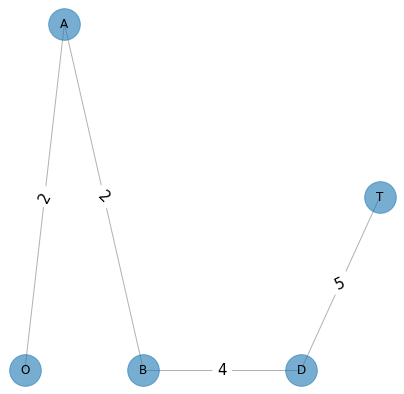

In [83]:
nodes_pos_sh_path_sol = [nodes_and_pos_std_model[k] for k in sh_path]

nodes_sh_path_sol = sh_path

nodes_and_pos_sh_path_sol = dict(zip(nodes_sh_path_sol, nodes_pos_sh_path_sol))

G_shortest_path_sol = nx.Graph() 
G_shortest_path_sol.add_nodes_from(nodes_sh_path_sol)

G_shortest_path_sol.add_edges_from(distances_sh_path)

plt.figure(figsize=(7, 7))
nx.draw_networkx_edges(G_shortest_path_sol, pos=nodes_and_pos_sh_path_sol, 
                       alpha=0.3, min_source_margin=8,
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_shortest_path_sol, pos=nodes_and_pos_sh_path_sol, 
                             edge_labels=distances_sh_path,
                             font_size=15)
nx.draw_networkx_labels(G_shortest_path_sol, pos=nodes_and_pos_sh_path_sol)
nx.draw_networkx_nodes(G_shortest_path_sol, pos=nodes_and_pos_sh_path_sol, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

```{admonition} Ejercicio
:class: tip

Encuentra la ruta más corta para la red dirigida $\mathcal{G}$ con los arcos siguientes: {(O, B): 5, (O, C): 4, (A, O): 2, (B, A): 2, (A, D): 7, (B, D): 4, (B, E): 3, (C, B): 1, (C, E): 4, (D, E): 1, (D, T): 5, (E, T): 7}.

Visualiza a la red, calcula la distancia de la solución y visualiza la red solución con sus distancias.

```

```{admonition} Comentario

El problema de la ruta más corta se puede reescribir en términos de flujos de redes si se interpreta al flujo como una variable de decisión que toma valores en $\{0,1\}$. Un flujo en un arco $(i,j)$ de $1$ indica que tal arco debe incluirse en la ruta y un valor de $0$ indica que no tenemos que incluir tal arco. Entonces:

$$x_{i,j} = \begin{cases}
0 & \text{si } (i,j) \text{ no está incluido en la ruta} \\
1 & \text{si } (i,j) \text{ está incluido en la ruta}
\end{cases}
$$

El flujo neto generado en un nodo es el flujo que sale menos el flujo que entra considerando que un nodo tiene un flujo de $1$ si está en la ruta y sin flujo en otro caso. Así, el origen tiene un flujo neto de $1$, el destino un flujo neto de $0$ y el resto de los nodos $0$.

```

### Flujo máximo

Supóngase que la red del ejemplo de la ruta más corta anterior representa a un parque con diferentes caminos por el que transitan un número de tranvías. Se desea determinar las rutas de algunos viajes de tranvías desde el nodo 'O' hasta el nodo 'T' de manera que el número de viajes sea máximo. (Cada tranvía debe regresar por la misma ruta que tomó de ida, por lo que el análisis se hace sólo sobre los viajes de ida). Para evitar perturbaciones innecesarias a la ecología y a la vida silvestre se impusieron límites superiores sobre el número de viajes de salida permitidos hacia el nodo 'T' para cada camino individual en la dirección de ida. Se tiene entonces la siguiente red dirigida en la que el número que aparece en cada arco representa el límite superior de viajes en la dirección de salida:

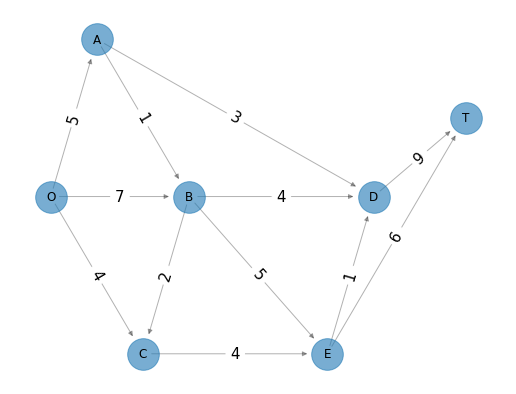

In [84]:
G_maximum_flow = nx.DiGraph() 
G_maximum_flow.add_nodes_from(nodes_std_model)

edge_capacities = {('O', 'A'): 5,
                   ('O', 'B'): 7,
                   ('O', 'C'): 4,
                   ('A', 'B'): 1,
                   ('A', 'D'): 3,
                   ('B', 'D'): 4,
                   ('B', 'E'): 5,               
                   ('B', 'C'): 2,
                   ('C', 'E'): 4,
                   ('D', 'T'): 9,
                   ('E', 'D'): 1,
                   ('E', 'T'): 6
                  } 
G_maximum_flow.add_edges_from(edge_capacities)

for e in G_maximum_flow.edges():
    G_maximum_flow[e[0]][e[1]]["capacity"] = edge_capacities[e]

plt.figure(figsize=(9, 7))
nx.draw_networkx_edges(G_maximum_flow, pos=nodes_and_pos_std_model, 
                       alpha=0.3, 
                       min_target_margin=20)
nx.draw_networkx_edge_labels(G_maximum_flow, pos=nodes_and_pos_std_model, 
                             edge_labels=edge_capacities,
                             font_size=15)
nx.draw_networkx_labels(G_maximum_flow, pos=nodes_and_pos_std_model)
nx.draw_networkx_nodes(G_maximum_flow, pos=nodes_and_pos_std_model, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

Una solución **factible** es enviar $7$ tranvías al día: $5$ por la ruta O-B-E-T, $1$ por la ruta $O-B-C-E-T$ y $1$ por la ruta $O-B-C-E-D-T$. Obsérvese que esta solución bloquea el uso de cualquier ruta que comience con el arco $(O,C)$ debido a que las capacidades del arco $(E,T)$ y $(E,D)$ están saturadas.

El problema anterior se conoce como de flujo máximo.

```{margin}

Ver [maximum_flow](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.maximum_flow.html)

```

In [85]:
flow_value, flow_dict = nx.maximum_flow(G_maximum_flow, 'O', 'T')

In [86]:
print(flow_value)

14


In [87]:
pprint.pprint(flow_dict)

{'A': {'B': 1, 'D': 3},
 'B': {'C': 0, 'D': 4, 'E': 3},
 'C': {'E': 4},
 'D': {'T': 8},
 'E': {'D': 1, 'T': 6},
 'O': {'A': 4, 'B': 6, 'C': 4},
 'T': {}}


**Red solución (se omiten los arcos con flujo igual a cero):**

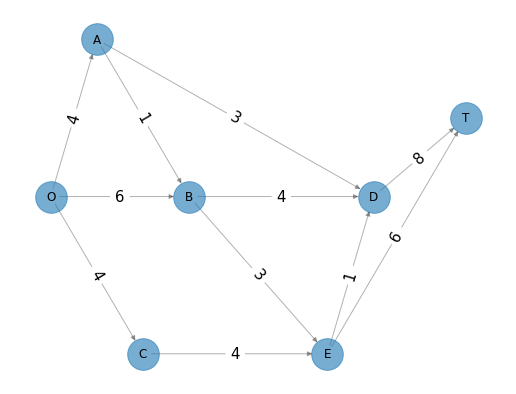

In [88]:
G_maximum_flow_solution = nx.DiGraph() 
G_maximum_flow_solution.add_nodes_from(nodes_std_model)

edge_flows = {('O', 'A'): 4,
                   ('O', 'B'): 6,
                   ('O', 'C'): 4,
                   ('A', 'B'): 1,
                   ('A', 'D'): 3,
                   ('B', 'D'): 4,
                   ('B', 'E'): 3,               
                   ('C', 'E'): 4,
                   ('D', 'T'): 8,
                   ('E', 'D'): 1,
                   ('E', 'T'): 6
                  } 
G_maximum_flow_solution.add_edges_from(edge_flows)

plt.figure(figsize=(9, 7))
nx.draw_networkx_edges(G_maximum_flow_solution, pos=nodes_and_pos_std_model, 
                       alpha=0.3, 
                       min_target_margin=15)
nx.draw_networkx_edge_labels(G_maximum_flow_solution, pos=nodes_and_pos_std_model, 
                             edge_labels=edge_flows,
                             font_size=15)
nx.draw_networkx_labels(G_maximum_flow_solution, pos=nodes_and_pos_std_model)
nx.draw_networkx_nodes(G_maximum_flow_solution, pos=nodes_and_pos_std_model, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

Entonces desde el nodo 'O' salen 14 tranvías: $4$ hacia el nodo 'A', $6$ hacia el nodo 'B' y $4$ hacia el nodo 'C'.

(EJREDFLUJOCOSTOMIN)=

### Flujo con costo mínimo

Al igual que el problema de flujo máximo, el problema de flujo con costo mínimo toma en cuenta un flujo en una red con capacidades en los arcos limitadas. Al igual que en el problema de la ruta más corta, considera un costo (o distancia) del flujo a través de un arco. Al igual que en el {ref}`problema de transporte <EJPROBTRANSPORTE>` o en el de asignación puede manejar varios orígenes (**nodos fuente**) y varios destinos (**nodos demanda**) del flujo, de nuevo con costos asociados. En realidad, estos cuatro problemas son casos especiales del problema del flujo de costo mínimo.

En el problema de costo mínimo se tienen las siguientes características:

* Al menos uno de los nodos es un nodo fuente.
* Al menos uno de los nodos es un nodo demanda.
* El resto de los nodos son nodos de transbordo.
* El costo del flujo a través del arco es proporcional a la cantidad de ese flujo. El costo es por unidad.
* El objetivo es minimiar el costo total e enviar el suministro disponible a través de la red para satisfacer la demanda dada. (Un objetivo alternativo puede ser el de maximizar la ganancia total del envío).

A continuación se muestra una red ejemplo de tal problema en la que se tienen nodos con etiquetas "A, B, C, D" y "E". Al lado de cada nodo en corchetes se presentan las "demandas". Los nodos origen tienen demanda negativa (proporcionan o suministran) que en la red son los nodos "A" y "B" (por ejemplo fábricas). Los nodos destino tienen demanda positiva (almacenan o reciben) que en la red son los nodos "D" y "E" (por ejemplo clientes). El único nodo de transbordo es el nodo "C" que tiene demanda igual a cero (centro de distribución por ejemplo). Los valores de los costos se muestran en los arcos. Únicamente se tienen capacidades en los arcos $(A, B)$ igual a $10$ y el arco $(C, E)$ igual a $80$:

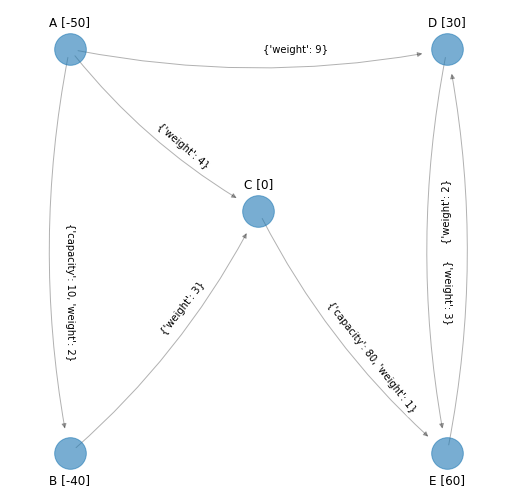

In [89]:
nodes_pos = [[0.18181818181818182, 0.7272727272727273],
             [0.18181818181818182, 0.2727272727272727],
             [0.5454545454545454, 0.2727272727272727],
             [0.5454545454545454, 0.7272727272727273],
             [0.36363636363636365, 0.5454545454545454]]

nodes = ['A', 'B', 'E', 'D', 'C']

nodes_and_pos = dict(zip(nodes, nodes_pos))

G_min_cost_flow = nx.DiGraph()

G_min_cost_flow.add_node('A', demand = -50, node_and_demand="A [-50]")
G_min_cost_flow.add_node('B', demand = -40, node_and_demand="B [-40]")
G_min_cost_flow.add_node('C', demand = 0, node_and_demand="C [0]")
G_min_cost_flow.add_node('D', demand = 30, node_and_demand="D [30]")
G_min_cost_flow.add_node('E', demand = 60, node_and_demand="E [60]")

edge_labels_min_cost_flow = {('A', 'B'): {"capacity": 10,
                            "weight": 2},
                             ('A', 'C'): {"weight": 4},
                             ('A', 'D'): {"weight": 9},
                             ('B', 'C'): {"weight": 3},
                             ('C', 'E'): {"capacity": 80,
                                          "weight": 1},
                             ('E', 'D'): {"weight": 2},
                             ('D', 'E'): {"weight": 3}
                            }


G_min_cost_flow.add_edges_from(edge_labels_min_cost_flow)
for e in G_min_cost_flow.edges():
    if e == ('A', 'B') or e == ('C', 'E'):
        G_min_cost_flow[e[0]][e[1]]["capacity"] = edge_labels_min_cost_flow[e]["capacity"]
        G_min_cost_flow[e[0]][e[1]]["weight"] = edge_labels_min_cost_flow[e]["weight"]
    else:
        G_min_cost_flow[e[0]][e[1]]["weight"] = edge_labels_min_cost_flow[e]["weight"]
        
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_min_cost_flow, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1")
nx.draw_networkx_edge_labels(G_min_cost_flow, pos=nodes_and_pos, 
                             edge_labels=edge_labels_min_cost_flow, label_pos=0.4,
                             font_size=10)
nodes_pos_modified = {}

y_off = 0.03

nodes_and_pos_modified = nodes_and_pos.copy()

for node in G_min_cost_flow.nodes():
    if node == 'B' or node == 'E':
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] - y_off]
    else:
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] + y_off]
        
    
labels = nx.get_node_attributes(G_min_cost_flow, "node_and_demand")

nx.draw_networkx_labels(G_min_cost_flow, pos=nodes_and_pos_modified, 
                        labels=labels)
nx.draw_networkx_nodes(G_min_cost_flow, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

En la red anterior el arco $(D, E)$ tiene costo igual a $3$ y el arco $(E, D)$ tiene costo igual a $2$.

El objetivo es satisfacer la "demanda" de todos los nodos de acuerdo a las capacidades de cada uno de ellos al menor costo posible.

```{margin}

Ver [min_cost_flow](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.min_cost_flow.html)

```

In [90]:
flowDict = nx.min_cost_flow(G_min_cost_flow)

In [91]:
pprint.pprint(flowDict)

{'A': {'B': 0, 'C': 40, 'D': 10},
 'B': {'C': 40},
 'C': {'E': 80},
 'D': {'E': 0},
 'E': {'D': 20}}


**Red solución (únicamente se muestran los arcos con flujo distinto de cero):**

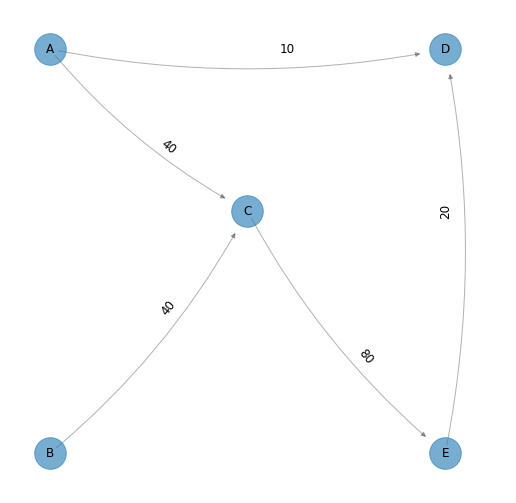

In [92]:
G_min_cost_flow_solution = nx.DiGraph()

G_min_cost_flow_solution.add_nodes_from(nodes)


edge_flows = {('A', 'C'): 40,
              ('A', 'D'): 10,
              ('B', 'C'): 40,
              ('C', 'E'): 80,           
              ('E', 'D'): 20
              }

G_min_cost_flow_solution.add_edges_from(edge_flows)

plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_min_cost_flow_solution, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1")
nx.draw_networkx_edge_labels(G_min_cost_flow_solution, pos=nodes_and_pos, 
                             edge_labels=edge_flows, label_pos=0.4,
                             font_size=12)
nx.draw_networkx_labels(G_min_cost_flow_solution, pos=nodes_and_pos)
nx.draw_networkx_nodes(G_min_cost_flow_solution, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

Con costo igual a:

In [93]:
print(nx.min_cost_flow_cost(G_min_cost_flow))

490


```{admonition} Comentario

Este costo se obtiene multiplicando el flujo por el costo de cada arco y sumando el resultado.

```

## Algunas aplicaciones de la IDO:

La siguiente tabla se extrajo de la referencia *Introduction to Operations Research* de F. Hillier, G. Lieberman:

|Organización | Área de aplicación | Ahorros anuales (usd)|
|:---:|:---:|:---:|
|Federal Express | Planeación logística de envíos | No estimados|
|Continental Airlines | Reasignación de tripulaciones a vuelos y reasignación de aviones cuando ocurren interrupciones en el itinerario| 40 millones para la primera aplicación y no estimados para la segunda aplicación|
|Swift & Company | Mejora del desempeño en ventas y manufactura | 12 millones|
|Memorial Sloan-Kettering Cancer Center | Diseño de terapia de radiación | 459 millones|
|United Airlines | Plan para los programas de trabajo de los empleados en aeropuertos y oficinas de reservación | 6 millones |
|Welch's | Optimización del uso y movimiento de materias primas | 150, 000|
|Samsung Electronics| Reducción de tiempos de manufactura y niveles de inventario | Ganancias adicionales de 200 millones|
|Pacific Lumber Company | Gestión de ecosistemas forestales a largo plazo | 398 millones Valor Presente Neto|
|Procter & Gamble| Rediseño del sistema de producción y distribución | 200 millones|
|Canadian Pacific Railway | Plan de rutas para un tren de carga | 100 millones|
|Air New Zealand |Programación de tripulaciones en una aerolínea| 6.7 millones|
|Taco Bell | Planeación de los programas de trabajo de los empleados de restaurantes | 13 millones |
|Gestión de desperdicios | Desarrollo de un sistema de administración de rutas para la recolección y disposición de basura | 100 millones |
|Ban Kapoalim Group | Desarrollo de un sistema de apoyo a las decisiones de asesores en inversiones | Ganancias adicionales de 31 millones |
|Sears | Rutas y programación de vehículos para servicio y entregas a domicilio | 42 millones |
|Conoco-Philips | Evaluación de proyectos de exploración petrolera | No estimados |
|Oficina de compensaciones a los trabajadores | Gestión de solicitudes de incapacidad y rehabilitación de alto riesto | 4 millones |
|Westinghouse |Evaluación de proyectos de investigación y desarrollo | No estimados |
|Merril Lynch | Administración del riesgo de liquidez de líneas de crédito revolventes. Análisis de precios de provisión de servicios financieros | Liquidez adicional de 4 mil millones para la primera aplicación y 50 millones para la segunda aplicación |
|PSA Peugeot Citröen | Guía para el proceso de diseño de plantas de ensamble de automóviles eficientes |Utilidades adicionales de 130 millones |
|KeyCorp| Mejora de la eficiencia de los cajeros de banco | 20 millones |
|General Motors | Mejora de la eficiencia de líneas de producción | 90 millones |
|Deere & Company |Administración de inventarios a lo largo de una cadena de suministro | Reducción de mil millones en inventario|
|Time Inc.|Administración de canales de distribución de revistas |Utilidades adicionales de 3.5 millones |
|Bank One Corporation |Administración de líneas de crédito y tasas de interés de tarjetas de crédito | Utilidades adicionales de 75 millones |
|AT & T | Diseño y operación de centros de atención telefónica | Utilidades adicionales de 750 millones |


Y una aplicación que encuentran en el libro *Network Flows, Theory, Algorithms and Applications* de R. K. Ahuja, T. L. Magnanti es la siguiente:

### Racial Balancing of Schools

In 1968, the U.S. Supreme Court ruled that all schools systems in the country should begin admitting students to schools on a nondisciminatory basis and should employ faster techniques to promote desegregated schools across the nation. This decision made it necessary for many school systems to develop radically different procedures for assigning students to schools. Since the Supreme Court did not specify what constitutes an acceptable racial balance, the individual school boards used their own best judgments to arrive at acceptable criteria on which to base their desegregation plans. A [multi-commodity flow problem](https://en.wikipedia.org/wiki/Multi-commodity_flow_problem) can be used for determining an optimal assignment of students to schools that minimizes the total distance traveled by students, given a specification of lower and upper limits on the required racial balance in each school.

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Preguntas de comprehensión.**

1)¿Cuáles son los modelos estándar de flujo en redes y da una descripción de los mismos?

2)Escribe algunos ejemplos de algoritmos que resuelven problemas de flujo en redes.

3)Escribe algunos ejemplos de problemas de flujo en redes diferentes a los dados en la nota.

4)¿A qué se refiere la capacidad de un arco?

5)¿Qué es una red dirigida con capacidades? (da sus elementos principales)

6)¿Cuáles representaciones computacionales existen para las redes? (puedes mencionar las descritas en esta nota u otras que conozcas)

7)Escribe las diferencias que existen entre 1:camino y caminata, 2:ciclo, árbol y bosque.

8)Responde verdadero o falso:

a.Una red dirigida tiene todos sus caminos dirigidos

b.Considera una red con nodos $\{0, 1, 2,3\}$ y arcos $(1, 2), (0,2), (0, 3), (1, 3)$ y el subgrafo inducido de ésta red por los nodos $\{0, 3\}$ entonces tal subgrafo contiene los arcos $(0,3), (0,2)$ y $(1,3)$.

c.Un *spanning subgraph* de una red puede no contener todos los nodos de la red.

d.Una red fuertemente conectada tiene caminos dirigidos.

e.Todo árbol es un bosque.

f.Dos nodos aislados son un bosque.

g.Uno sólo nodo es un bosque.

h.Uno sólo nodo es un árbol.

9)¿Qué es un *spanning tree*? ¿qué son los *tree arcs* y los *non tree arcs*?

10)¿Qué son los ciclos fundamentales?

11)¿Qué son los cortes fundamentales?



**Referencias:**

1. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.

2. R. K. Ahuja, T. L. Magnanti, J. B. Orlin, Network Flows, Theory, Algorithms and Applications, Prentice Hall, 1993.

1. M. S. Bazaraa, J. J. Jarvis, H. D. Sherali, Linear Programming and Network Flows, Wiley, 2010.



